# Regularized Linear Regression

In the first half of the exercise, we will implement regularized linear regres-
sion to predict the amount of water flowing out of a dam using the change
of water level in a reservoir. In the next half, you will go through some diag-
nostics of debugging learning algorithms and examine the effects of bias v.s.
variance.

In [1]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
from scipy.optimize import fmin_cg

In [2]:
data=loadmat("data/ex5data1.mat")

In [3]:
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Fri Nov  4 22:27:26 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[-15.93675813],
        [-29.15297922],
        [ 36.18954863],
        [ 37.49218733],
        [-48.05882945],
        [ -8.94145794],
        [ 15.30779289],
        [-34.70626581],
        [  1.38915437],
        [-44.38375985],
        [  7.01350208],
        [ 22.76274892]]),
 'y': array([[ 2.13431051],
        [ 1.17325668],
        [34.35910918],
        [36.83795516],
        [ 2.80896507],
        [ 2.12107248],
        [14.71026831],
        [ 2.61418439],
        [ 3.74017167],
        [ 3.73169131],
        [ 7.62765885],
        [22.7524283 ]]),
 'Xtest': array([[-33.31800399],
        [-37.91216403],
        [-51.20693795],
        [ -6.13259585],
        [ 21.26118327],
        [-40.31952949],
        [-14.54153167],
        [ 32.55976024],
        [ 13.39343255],
        [ 44.20988595],
        [ -1.14267768],
        [-

In [4]:
X_train=data['X']
Y_train=data['y']
X_val=data['Xval']
Y_val=data['yval']
X_test=data['Xtest']
Y_test=data['ytest']

# Visualize The Data

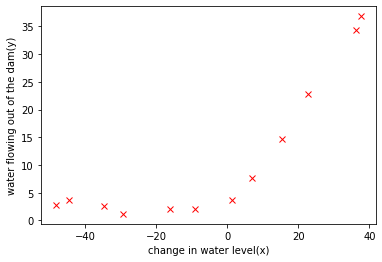

In [5]:
plt.plot(X_train,Y_train,"rx")
plt.xlabel("change in water level(x)")
plt.ylabel("water flowing out of the dam(y)");

# Feature normalization

In [6]:
def featurenorm(X):
    mu=np.mean(X,axis=0)
    std=np.std(X,axis=0)
    X=(X-mu)/std
    return X,mu,std

In [7]:
X_train,mu_x,std_x=featurenorm(data['X'])

In [8]:
X_train.shape

(12, 1)

In [9]:
X_train

array([[-0.3782437 ],
       [-0.8389201 ],
       [ 1.43871736],
       [ 1.4841233 ],
       [-1.49791929],
       [-0.13440928],
       [ 0.71084425],
       [-1.03249041],
       [ 0.22568376],
       [-1.36981778],
       [ 0.42173105],
       [ 0.97070085]])

In [10]:
Y_train,mu_y,std_y=featurenorm(data['y'])

In [11]:
Y_train

array([[-0.72707207],
       [-0.80399973],
       [ 1.85236554],
       [ 2.05078504],
       [-0.67306927],
       [-0.72813171],
       [ 0.27957188],
       [-0.68866051],
       [-0.59853073],
       [-0.59920954],
       [-0.28735639],
       [ 0.92330747]])

# Regularized Cost Function

In [12]:
def computecost(theta,X,Y,lamb):
    theta=theta.reshape((len(theta),1))
    m=len(X)
    J=(0.5/m)*(np.sum((np.dot(X,theta)-Y)**2)) + (0.5*lamb/m)*(np.sum(theta**2)-theta[0]**2)
    return J


In [13]:
X_train=np.hstack((np.ones((len(X_train),1)),X_train))

In [14]:
X_train.shape

(12, 2)

In [15]:
computecost(np.array([1,1]),X_train,Y_train,1)

array([0.69710114])

# Regularized linear regression gradient

In [16]:
def gradient(theta,X,Y,lamb):
    m=len(X)
    theta=theta.reshape((len(theta),1))
    grad=np.dot(X.T,(np.dot(X,theta)-Y)) + (lamb/m)*theta
    grad[0]=grad[0]-(lamb/m)*theta[0]
    return np.ndarray.flatten(grad)

In [17]:
init_gradients=gradient(np.array([1,1]),X_train,Y_train,1)

In [18]:
init_gradients

array([12.        ,  1.94854706])

# Fitting Model

In [19]:
Theta=fmin_cg(computecost,np.array([1,1]),gradient,args=(X_train,Y_train,0))

Optimization terminated successfully.
         Current function value: 0.143355
         Iterations: 6
         Function evaluations: 26
         Gradient evaluations: 26


# Visualizing Results

In [20]:
x=np.linspace(-60,60,1500)
x_norm=(x-mu_x)/std_x

x_norm=np.hstack((np.ones((len(x_norm),1)),x_norm.reshape((1500,1))))

In [21]:
y=np.dot(x_norm,Theta)

In [22]:
y=(y*std_y)+mu_y

In [23]:
y

array([-8.97885025, -8.94940828, -8.91996632, ..., 35.09577341,
       35.12521537, 35.15465734])

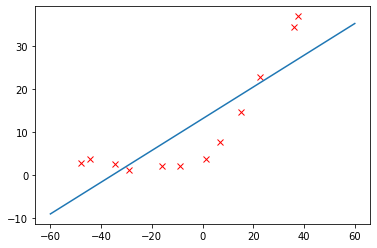

In [24]:
plt.plot(data['X'],data['y'],'rx')
plt.plot(x,y)

# Learning curves

In [25]:
def plot_learning_curves(X_train,Y_train,X_val,Y_val):
    cost_train=[]
    cost_val=[]
    
    
    for i in range(1,len(X_train)+1):
        x=X_train[0:i]
        
        y=Y_train[0:i]
        
        
        x=np.hstack((np.ones((len(x),1)),x))
        Theta=fmin_cg(computecost,np.array([1,1]),gradient,args=(x,y,0))
        cost_train.append(computecost(Theta,x,y,0))
        
        x_val=X_val
        x_val=np.hstack((np.ones((len(x_val),1)),x_val))
        y_val=Y_val
        
        cost_val.append(computecost(Theta,x_val,y_val,0))
    
    plt.plot([i for i in range(1,len(X_train)+1)],cost_train)
    plt.plot([i for i in range(1,len(X_train)+1)],cost_val)
       
        
        

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 2
         Function evaluations: 4
         Gradient evaluations: 4
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 27
         Function evaluations: 105
         Gradient evaluations: 98
Optimization terminated successfully.
         Current function value: 3.286595
         Iterations: 31
         Function evaluations: 123
         Gradient evaluations: 121
Optimization terminated successfully.
         Current function value: 2.842678
         Iterations: 34
         Function evaluations: 164
         Gradient evaluations: 151
Optimization terminated successfully.
         Current function value: 13.154049
         Iterations: 59
         Function evaluations: 208
         Gradient evaluations: 204
         Current function value: 19.443963
         Iterations: 43
         Function evaluations: 195
         Gradient evaluations: 18

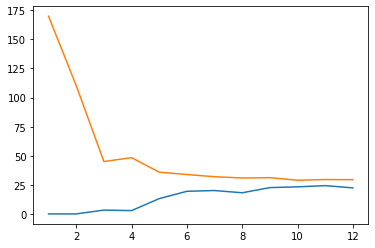

In [26]:
plot_learning_curves(data['X'],data['y'],data['Xval'],data['yval'])

In Figure , you can observe that both the train error and cross validation
error are high when the number of training examples is increased. This
reflects a high bias problem in the model – the linear regression model istoo simple and is unable to fit our dataset well. In the next section, you will
implement polynomial regression to fit a better model for this dataset.

# Polynomial regression

The problem with our linear model was that it was too simple for the data
and resulted in underfitting (high bias). In this part of the exercise, you will
address this problem by adding more features

Notice that by defining x 1 = (waterLevel), x 2 = (waterLevel) 2 , . . . , x p =
(waterLevel) p , we obtain a linear regression model where the features are the
various powers of the original value (waterLevel).
Now, you will add more features using the higher powers of the existing
feature x in the dataset.

In [27]:
def poly_features(X,p):
    tmp=X**(0)
    for i in range(1,p+1):
        tmp=np.hstack((tmp,X**(i)))
        
    return tmp
        

In [28]:
X_poly_train=poly_features(data['X'],8)

In [29]:
X_poly_train.shape

(12, 9)

In [30]:
X_poly_train

array([[ 1.00000000e+00, -1.59367581e+01,  2.53980260e+02,
        -4.04762197e+03,  6.45059724e+04, -1.02801608e+06,
         1.63832436e+07, -2.61095791e+08,  4.16102047e+09],
       [ 1.00000000e+00, -2.91529792e+01,  8.49896197e+02,
        -2.47770062e+04,  7.22323546e+05, -2.10578833e+07,
         6.13900035e+08, -1.78970150e+10,  5.21751305e+11],
       [ 1.00000000e+00,  3.61895486e+01,  1.30968343e+03,
         4.73968522e+04,  1.71527069e+06,  6.20748719e+07,
         2.24646160e+09,  8.12984311e+10,  2.94215353e+12],
       [ 1.00000000e+00,  3.74921873e+01,  1.40566411e+03,
         5.27014222e+04,  1.97589159e+06,  7.40804977e+07,
         2.77743990e+09,  1.04132297e+11,  3.90414759e+12],
       [ 1.00000000e+00, -4.80588295e+01,  2.30965109e+03,
        -1.10999128e+05,  5.33448815e+06, -2.56369256e+08,
         1.23208064e+10, -5.92123532e+11,  2.84567638e+13],
       [ 1.00000000e+00, -8.94145794e+00,  7.99496701e+01,
        -7.14866612e+02,  6.39194974e+03, -5.715334

# Feature Normalization

In [31]:
mu=np.mean(X_poly_train[:,1:],axis=0).reshape((1,X_poly_train.shape[1]-1))

In [32]:
mu

array([[-5.08542635e+00,  8.48904834e+02, -1.28290173e+04,
         1.28967789e+06, -2.98314592e+07,  2.29330301e+09,
        -6.84527284e+10,  4.42233759e+12]])

In [33]:
std=np.std(X_poly_train[:,1:],axis=0).reshape((1,X_poly_train.shape[1]-1))

In [34]:
std

array([[2.86887308e+01, 7.54346385e+02, 4.61380464e+04, 1.66104441e+06,
        8.99399404e+07, 3.68940106e+09, 1.89508052e+11, 8.31905350e+12]])

In [35]:
X_poly_train=np.hstack((X_poly_train[:,0].reshape((len(X_poly_train),1)),(X_poly_train[:,1:]-mu)/std))

In [36]:
X_poly_train.shape

(12, 9)

In [37]:
X_poly_train

array([[ 1.00000000e+00, -3.78243704e-01, -7.88662325e-01,
         1.90328720e-01, -7.37591303e-01,  3.20251970e-01,
        -6.17151602e-01,  3.59835014e-01, -5.31091256e-01],
       [ 1.00000000e+00, -8.38920100e-01,  1.31420204e-03,
        -2.58961742e-01, -3.41564822e-01,  9.75492734e-02,
        -4.55196644e-01,  2.66773432e-01, -4.68873807e-01],
       [ 1.00000000e+00,  1.43871736e+00,  6.10831582e-01,
         1.30534069e+00,  2.56220001e-01,  1.02186338e+00,
        -1.26962121e-02,  7.90210009e-01, -1.77926980e-01],
       [ 1.00000000e+00,  1.48412330e+00,  7.38068463e-01,
         1.42031240e+00,  4.13121830e-01,  1.15534830e+00,
         1.31223708e-01,  9.10700224e-01, -6.22895388e-02],
       [ 1.00000000e+00, -1.49791929e+00,  1.93643966e+00,
        -2.12774745e+00,  2.43510061e+00, -2.51876748e+00,
         2.71792174e+00, -2.76331690e+00,  2.88908182e+00],
       [ 1.00000000e+00, -1.34409278e-01, -1.01936614e+00,
         2.62563148e-01, -7.72577738e-01,  3.310465

# Fitting The Model

In [38]:
Theta=fmin_cg(computecost,np.array([1 for i in range(X_poly_train.shape[1])]),gradient,args=(X_poly_train,data['y'],1))

         Current function value: 7.074064
         Iterations: 7
         Function evaluations: 90
         Gradient evaluations: 78


In [39]:
Theta

array([10.88715632,  8.61104416,  4.50960608,  3.48361107,  2.27892261,
        1.90501321,  1.48010179,  1.48198181,  1.05841542])

In [40]:
Theta.shape

(9,)

# Visualize The Results

In [41]:
x=np.linspace(-60,60,1500).reshape((1500,1))
x_copy=x[:]

In [42]:
x=poly_features(x,8)

In [43]:
x.shape

(1500, 9)

In [44]:
x=np.hstack((x[:,0].reshape((1500,1)),(x[:,1:]-mu)/std))

In [45]:
x

array([[  1.        ,  -1.91415138,   3.64699191, ...,  12.02436285,
        -14.41050785,  19.65839772],
       [  1.        ,  -1.91136097,   3.63426567, ...,  11.92346479,
        -14.27309747,  19.44389784],
       [  1.        ,  -1.90857056,   3.62155642, ...,  11.82323849,
        -14.13678417,  19.23139462],
       ...,
       [  1.        ,   2.26309488,   3.62155642, ...,  11.82323849,
         14.85920971,  19.23139462],
       [  1.        ,   2.26588529,   3.63426567, ...,  11.92346479,
         14.99552301,  19.44389784],
       [  1.        ,   2.2686757 ,   3.64699191, ...,  12.02436285,
         15.13293339,  19.65839772]])

In [46]:
y=np.dot(x,Theta.reshape((len(Theta),1)))

In [47]:
y.shape

(1500, 1)

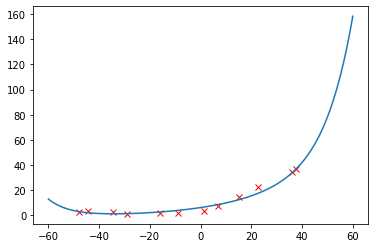

In [121]:
plt.plot(data['X'],data['y'],"rx")
plt.plot(x_copy,y)

# Thank You